In [2]:
import os
import json
import logging
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [3]:
def plot(df: pd.DataFrame, year: str) -> None:
    figure(figsize=(12, 6), dpi=80)
    plt.bar(df["time"], df["total"], label="Total Rows")
    plt.bar(df["time"], df["missing"], label="Missing Rows")
    plt.xlabel("time")
    plt.ylabel("Count")
    plt.title(f"Total Rows vs Missing Rows for {str(year)}")
    plt.legend()
    plt.show()


In [4]:
def plot_summary(total_data_points: list, total_missing_points: list) -> None:
    # Plotting
    labels = ['Total Data Points', 'Missing Data']
    values = [total_data_points, total_missing_points]
    plt.bar(labels, values)
    
    # Adding text labels on the bars
    for i, v in enumerate(values):
        plt.text(i, v, str(v), ha='center', va='bottom')
    
    # Display the plot
    plt.title('Total Data Points vs Missing Data')
    plt.show()

In [5]:
def main(date_range: dict) -> None:
    data_dict = {}
    data_dict["time"] = []
    data_dict["total"] = []
    data_dict["missing"] = []
    
    total_data_dict = {}
    total_data_dict["time"] = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    total_data_dict["total"] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    total_data_dict["missing"] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
    for yr in range(date_range["start"], date_range["end"]+1):
        data_dict = {}
        data_dict["time"] = []
        data_dict["total"] = []
        data_dict["missing"] = []
    
        with open(f"data/{yr}_summary.json", 'r') as j:
             data = json.loads(j.read())
        data_keys = data.keys()
        
        for i, k in enumerate(data_keys):
            #get indivisual year data
            data_dict["time"].append(f"{yr}_{k}")
            data_dict["total"].append(data[k]["number of total rows"])
            data_dict["missing"].append(data[k]["number of missing rows"])
    
            #get all years combines data
            total_data_dict["total"][i] += data[k]["number of total rows"]
            total_data_dict["missing"][i] += data[k]["number of missing rows"]
        
        #build dataframe for indivisual year
        df = pd.DataFrame.from_dict(data_dict)
        plot(df, str(yr))
    
    #build dataframe for indivisual year
    df = pd.DataFrame.from_dict(total_data_dict)
    plot(df, f"{date_range['start']} to {date_range['end']}")
    
    total_data_points = sum(total_data_dict["total"])
    total_missing_points = sum(total_data_dict["missing"])
    plot_summary(total_data_points, total_missing_points)

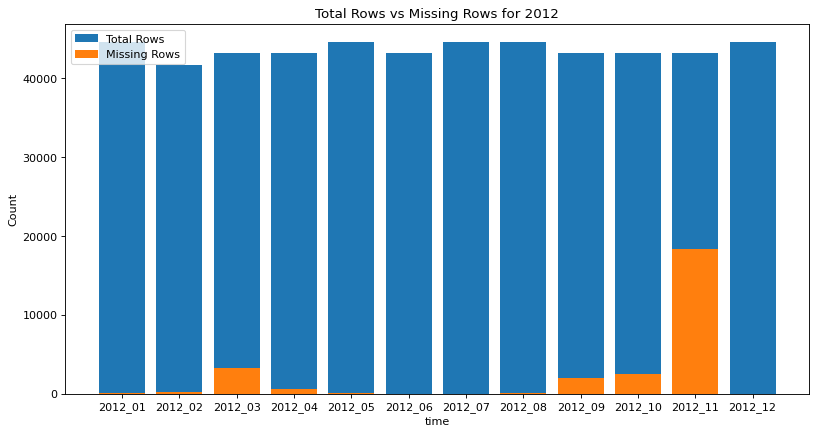

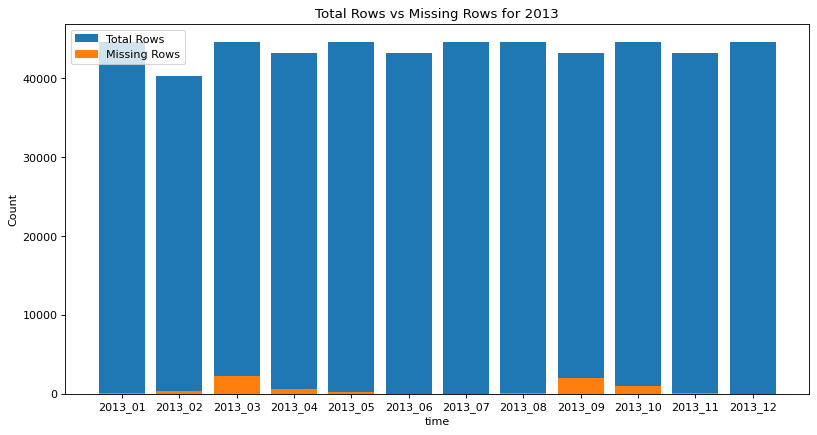

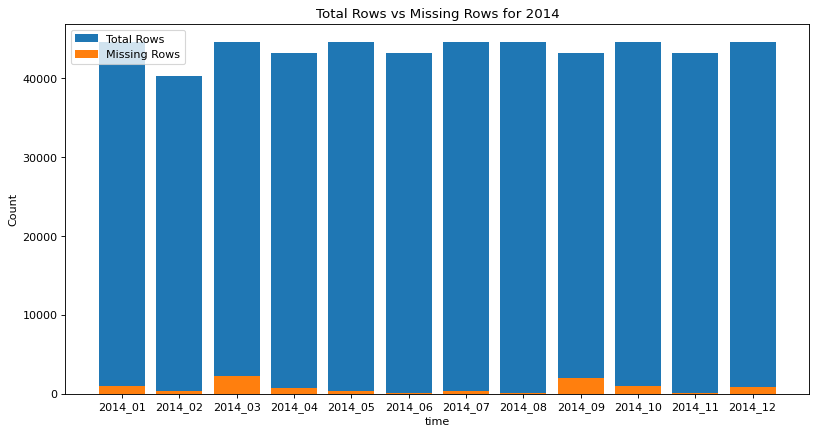

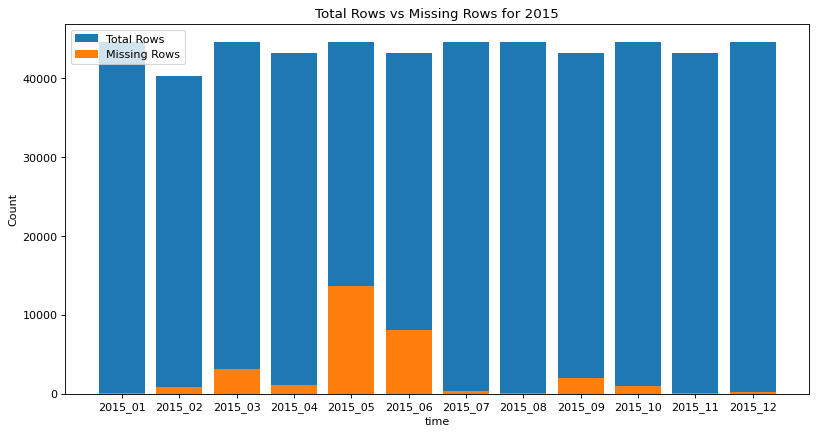

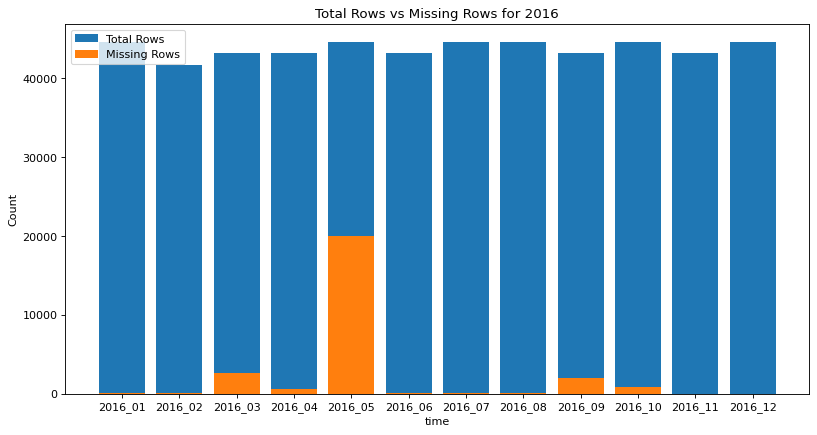

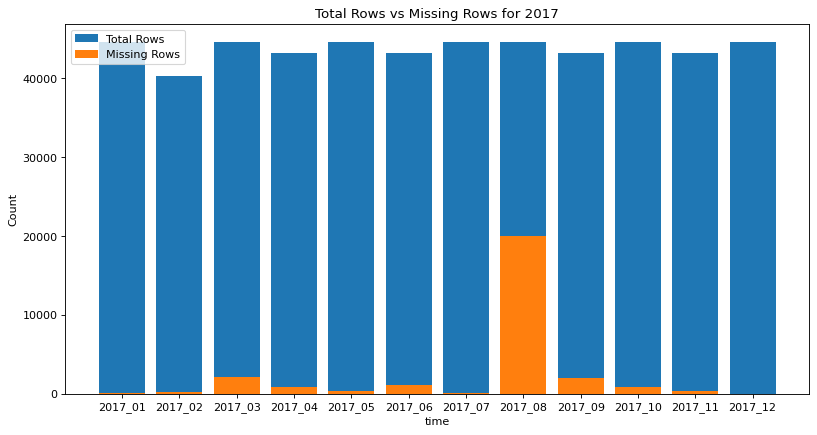

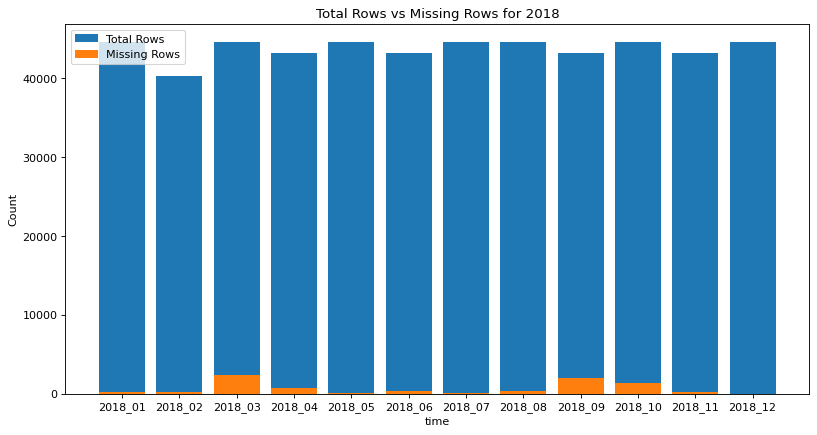

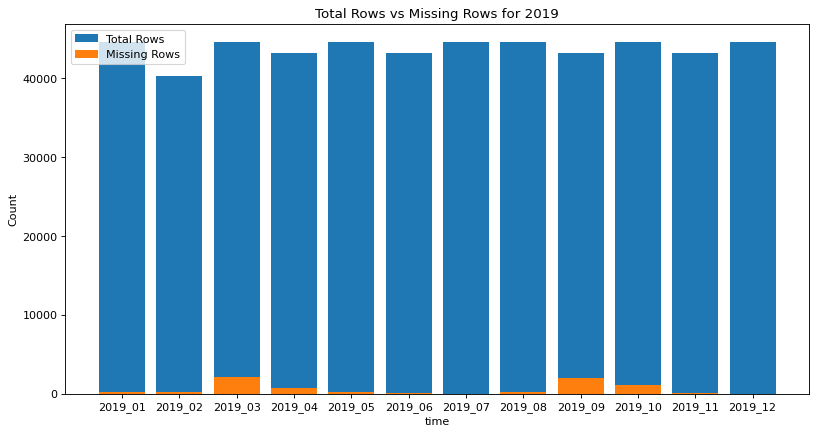

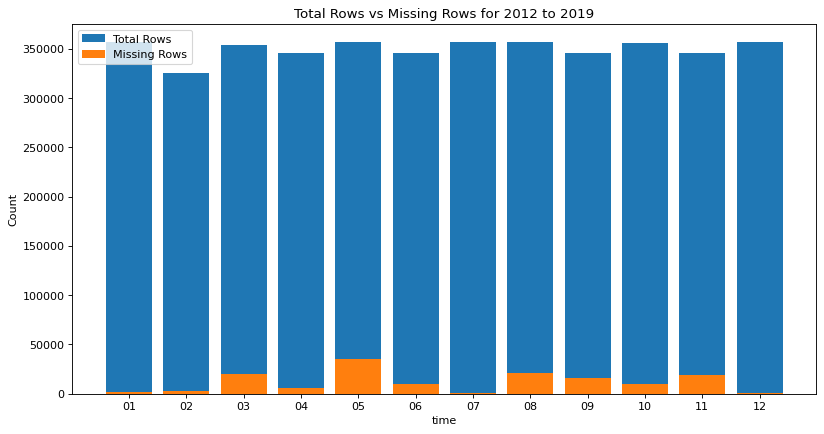

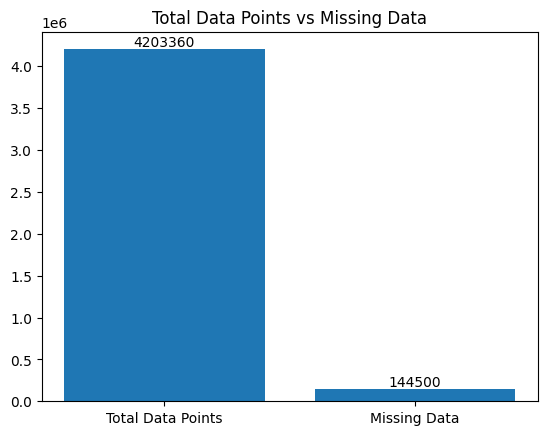

In [6]:
date_range = {
    "start": 2012,
    "end": 2019
}
main(date_range)